## Рабочая тетрадь №5 Меджидов Магомедпаша Султанович БФБО-01-22

Курс № 1 Семестр № 2

## Задание 1
Дан массив данных

X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])
Требуется провести кластерный анализ данных методом k-средних. Поэкспериментируйте с количеством кластеров.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91]])

kmeans = KMeans(n_clusters=10, random_state=2)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape


(10, 2)

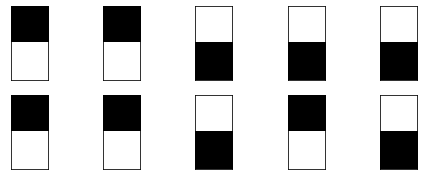

In [2]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 2, 1)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


## Задание 2

Выполните кластеризацию для набора данных ирисов Фишера. Выполните предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [3]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Загружаем данные
data = load_iris()
X = data.data
y = data.target

Text(0, 0.5, 'Sepal Width')

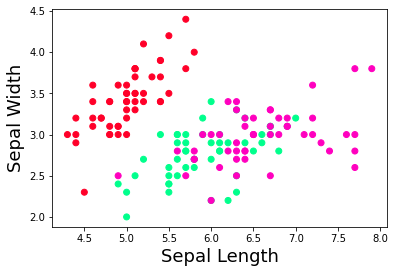

In [4]:
# Отображаем данные
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [5]:
# Выполняем кластеризацию
km = KMeans(n_clusters = 3, random_state=0)
km.fit(X)

KMeans(n_clusters=3, random_state=0)

Text(0.5, 1.0, 'Predicted')

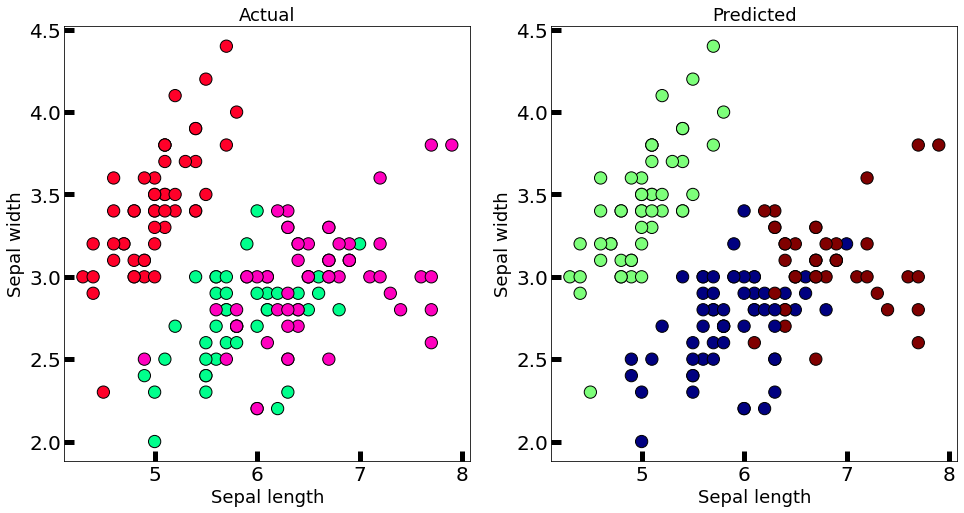

In [6]:
# Отображаем результаты кластеризации
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

C:\Users\MI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Sum of squared distance')

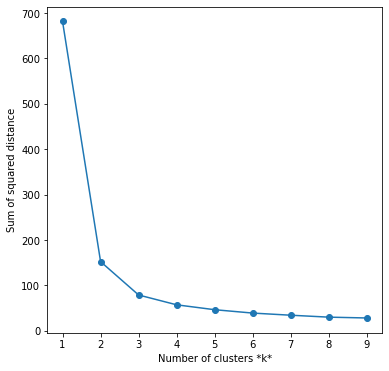

In [7]:
# Выполняем предсказания для модели
y_km = km.fit_predict(X)

# Поэкспериментируем с количеством кластеров
sse = []
list_k = range(1, 10)

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Отображаем результаты
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance')

## Задание 3

Задание. Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (всего их четыре).

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
data.shape

(150, 5)

In [14]:
df = data.iloc[:, 0:2].values
df

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

<Figure size 5040x2160 with 0 Axes>

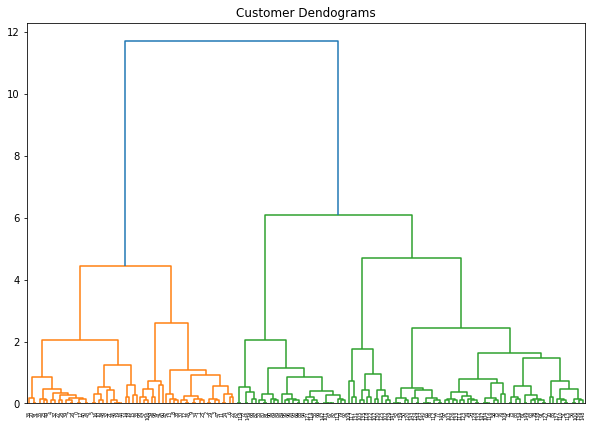

In [16]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10, 7))
plt.title('Customer Dendograms')
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 4, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 3, 1, 1, 3, 0, 3, 1, 3,
       1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

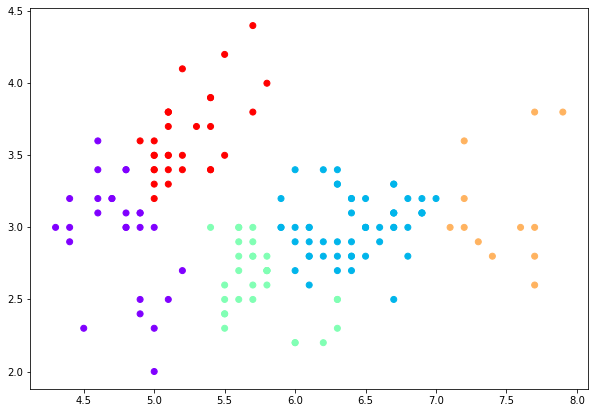

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(df[:, 0], df[:, 1], c=cluster.labels_, cmap='rainbow')